 **Importar las librerias y cargar un Dataset**

In [61]:
#Importamos las librerias necesarias para cargar el dataset y para realizar los calculos como el analisis descriptivo y medidas de tendencia central
# para posteriormente graficar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # Libreria utilizada para marcar una escala de 0 a 1 en la data
from sklearn.model_selection import train_test_split # Libreria utilizada para dividir los datos. Un conjunto de entrenamiento y otro de pruebas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


In [62]:
# Cargamos el archivo a partir de una URL en GitHub el cual se cargo el dataset
URL = 'https://raw.githubusercontent.com/alejof117/Datasets/main/ReportePruebaUnificado.csv'

Dataset_BD = pd.read_csv(URL)
Dataset_BD = Dataset_BD.fillna(0)
Dataset_BD

,OPERACION,MSGID,CODIGO,TIEMPOMQ,TIPO,TiempoTransaccion
0,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1451605,0.0,8/05/2025 17:59,Resp,17.0
1,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1451605,0.0,8/05/2025 17:59,Req,0.0
2,EnviarCreditoCORACH_NIC,414D5120464C434F524D455342524B41680ED698A144051C,0.0,8/05/2025 17:59,Resp,4.0
3,EnviarCreditoCORACH_NIC,414D5120464C434F524D455342524B41680ED698A144051C,0.0,8/05/2025 17:59,Req,0.0
4,ValidarDebitoCongeladoACH_NIC,414D5120464C434F524D455342524B41680ED698A143B61B,0.0,8/05/2025 17:59,Resp,1.0
...,...,...,...,...,...,...
21361,ConsultarEnviadasMonedaLocalACH_NIC,414D51204352434F524D455342524B416819ACEA42D13463,0.0,8/05/2025 9:42,Req,0.0
21362,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42BA26B7,0.0,8/05/2025 9:30,Resp,0.0
21363,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42BA26B7,0.0,8/05/2025 9:30,Req,0.0
21364,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA421E1C27,0.0,8/05/2025 10:09,Resp,0.0


 **Creacion de un Dataframe en pandas a partir de un Dataset**

In [63]:
# Convierto en un Dataframe
DataFrame_BD = pd.DataFrame(Dataset_BD)
DataFrame_BD

,OPERACION,MSGID,CODIGO,TIEMPOMQ,TIPO,TiempoTransaccion
0,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1451605,0.0,8/05/2025 17:59,Resp,17.0
1,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1451605,0.0,8/05/2025 17:59,Req,0.0
2,EnviarCreditoCORACH_NIC,414D5120464C434F524D455342524B41680ED698A144051C,0.0,8/05/2025 17:59,Resp,4.0
3,EnviarCreditoCORACH_NIC,414D5120464C434F524D455342524B41680ED698A144051C,0.0,8/05/2025 17:59,Req,0.0
4,ValidarDebitoCongeladoACH_NIC,414D5120464C434F524D455342524B41680ED698A143B61B,0.0,8/05/2025 17:59,Resp,1.0
...,...,...,...,...,...,...
21361,ConsultarEnviadasMonedaLocalACH_NIC,414D51204352434F524D455342524B416819ACEA42D13463,0.0,8/05/2025 9:42,Req,0.0
21362,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42BA26B7,0.0,8/05/2025 9:30,Resp,0.0
21363,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42BA26B7,0.0,8/05/2025 9:30,Req,0.0
21364,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA421E1C27,0.0,8/05/2025 10:09,Resp,0.0


In [64]:
#DataFrame_BD['TiempoTransaccion'] = DataFrame_BD['TiempoTransaccion'].replace({0: "00:00"})
#DataFrame_BD

In [65]:
# Realizamos la distincion entre transacciones buenas y malas
DataFrame_BD['CODIGO'] = DataFrame_BD['CODIGO'].replace({0: "B", -22: "M"})
DataFrame_BD

,OPERACION,MSGID,CODIGO,TIEMPOMQ,TIPO,TiempoTransaccion
0,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1451605,B,8/05/2025 17:59,Resp,17.0
1,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1451605,B,8/05/2025 17:59,Req,0.0
2,EnviarCreditoCORACH_NIC,414D5120464C434F524D455342524B41680ED698A144051C,B,8/05/2025 17:59,Resp,4.0
3,EnviarCreditoCORACH_NIC,414D5120464C434F524D455342524B41680ED698A144051C,B,8/05/2025 17:59,Req,0.0
4,ValidarDebitoCongeladoACH_NIC,414D5120464C434F524D455342524B41680ED698A143B61B,B,8/05/2025 17:59,Resp,1.0
...,...,...,...,...,...,...
21361,ConsultarEnviadasMonedaLocalACH_NIC,414D51204352434F524D455342524B416819ACEA42D13463,B,8/05/2025 9:42,Req,0.0
21362,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42BA26B7,B,8/05/2025 9:30,Resp,0.0
21363,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42BA26B7,B,8/05/2025 9:30,Req,0.0
21364,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA421E1C27,B,8/05/2025 10:09,Resp,0.0


In [66]:
# Se filtran solo las respuestas, ya que es la informacion relevante
DataFrameResp_BD = DataFrame_BD[DataFrame_BD['TIPO'] == 'Resp']
DataFrameResp_BD

,OPERACION,MSGID,CODIGO,TIEMPOMQ,TIPO,TiempoTransaccion
0,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1451605,B,8/05/2025 17:59,Resp,17.0
2,EnviarCreditoCORACH_NIC,414D5120464C434F524D455342524B41680ED698A144051C,B,8/05/2025 17:59,Resp,4.0
4,ValidarDebitoCongeladoACH_NIC,414D5120464C434F524D455342524B41680ED698A143B61B,B,8/05/2025 17:59,Resp,1.0
6,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1439D04,M,8/05/2025 17:59,Resp,28.0
8,EnviarCreditoUSDACH_NIC,414D5120464C434F524D455342524B41680ED698A1436906,M,8/05/2025 17:59,Resp,28.0
...,...,...,...,...,...,...
21356,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42F347BD,B,8/05/2025 9:47,Resp,0.0
21358,EnviarCreditoCORACH_NIC,414D51204352434F524D455342524B416819ACEA42D134F0,B,8/05/2025 9:44,Resp,5.0
21360,ConsultarEnviadasMonedaLocalACH_NIC,414D51204352434F524D455342524B416819ACEA42D13463,B,8/05/2025 9:42,Resp,1.0
21362,ValidarDebitoCongeladoACH_NIC,414D51204352434F524D455342524B416819ACEA42BA26B7,B,8/05/2025 9:30,Resp,0.0


In [67]:
# Se realiza la distincion entre las peticiones buenas y malas
DF_Diagnostico = DataFrameResp_BD['CODIGO'].value_counts()
DF_Diagnostico

,count
CODIGO,
B,9803
M,880


In [68]:
# Porcentaje de Peticiones
Peticiones = ['Exitosas','Error']
Cantidad = [DF_Diagnostico.B, DF_Diagnostico.M]

TotalPeticiones = sum(Cantidad)

Porcentaje = [((DF_Diagnostico.B * 100)/TotalPeticiones), ((DF_Diagnostico.M * 100)/TotalPeticiones)]

DataFrame_Analisis = {'Peticionés': Peticiones, 'Cantidad': Cantidad, 'Porcentaje': Porcentaje}
DataFrame_Analisis = pd.DataFrame(DataFrame_Analisis)
DataFrame_Analisis


,Peticionés,Cantidad,Porcentaje
0,Exitosas,9803,91.762613
1,Error,880,8.237387


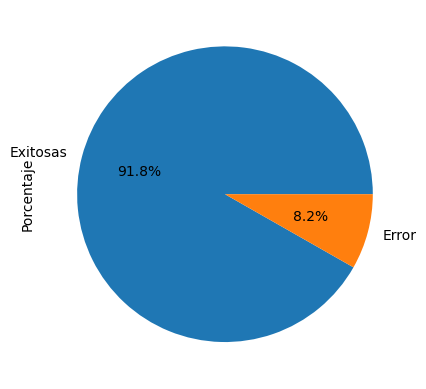

In [69]:
# Grafica de porcentajes
labels = ['Exitosas','Error']
DataFrame_Analisis.Porcentaje.plot.pie(labels=labels, autopct='%1.1f%%')
plt.show()


**----------------------------------------------------------------  Medidas de posición -----------------------------------------------------------------**

**Medidas de posición central:** indican los valores centrales de una distribución.

- **Media:** es el promedio de todos los datos de la muestra.

- **Mediana:** es el valor del medio de todos los datos ordenados de menor a mayor.

- **Moda:** es el valor que más se repite del conjunto de datos.

In [78]:
media = DataFrame_BD['TiempoTransaccion'].mean()
mediana = DataFrame_BD['TiempoTransaccion'].median()
moda = DataFrame_BD['TiempoTransaccion'].mode()[0]

Medida = ['Moda','Mediana','Media']
Valor = [moda, mediana, media]
Dataframe_TCentral = {'Medida': Medida, 'Valor': Valor}
Dataframe_TCentral = pd.DataFrame(Dataframe_TCentral)
Dataframe_TCentral


,Medida,Valor
0,Moda,0.000000
1,Mediana,0.000000
2,Media,4.221239


In [81]:
# Se realiza la distincion entre las operaciones
DF_Diagnostico_Op = DataFrameResp_BD['OPERACION'].value_counts()
DF_Diagnostico_Op

,count
OPERACION,
EnviarCreditoCORACH_NIC,3678
EnviarCreditoUSDACH_NIC,3503
ValidarDebitoCongeladoACH_NIC,3295
ConsultarEnviadasMonedaLocalACH_NIC,135
ConsultarHistoricoACH_NIC,72


In [94]:
# Se realiza la distincion entre las operaciones para tranzacciones exitosas y con error -22
DF_Diagnostico_OpCod = DataFrameResp_BD[['OPERACION','CODIGO']].value_counts().reset_index(name='count')
DF_Diagnostico_OpCod

,OPERACION,CODIGO,count
0,ValidarDebitoCongeladoACH_NIC,B,3295
1,EnviarCreditoCORACH_NIC,B,3234
2,EnviarCreditoUSDACH_NIC,B,3068
3,EnviarCreditoCORACH_NIC,M,444
4,EnviarCreditoUSDACH_NIC,M,435
5,ConsultarEnviadasMonedaLocalACH_NIC,B,134
6,ConsultarHistoricoACH_NIC,B,72
7,ConsultarEnviadasMonedaLocalACH_NIC,M,1


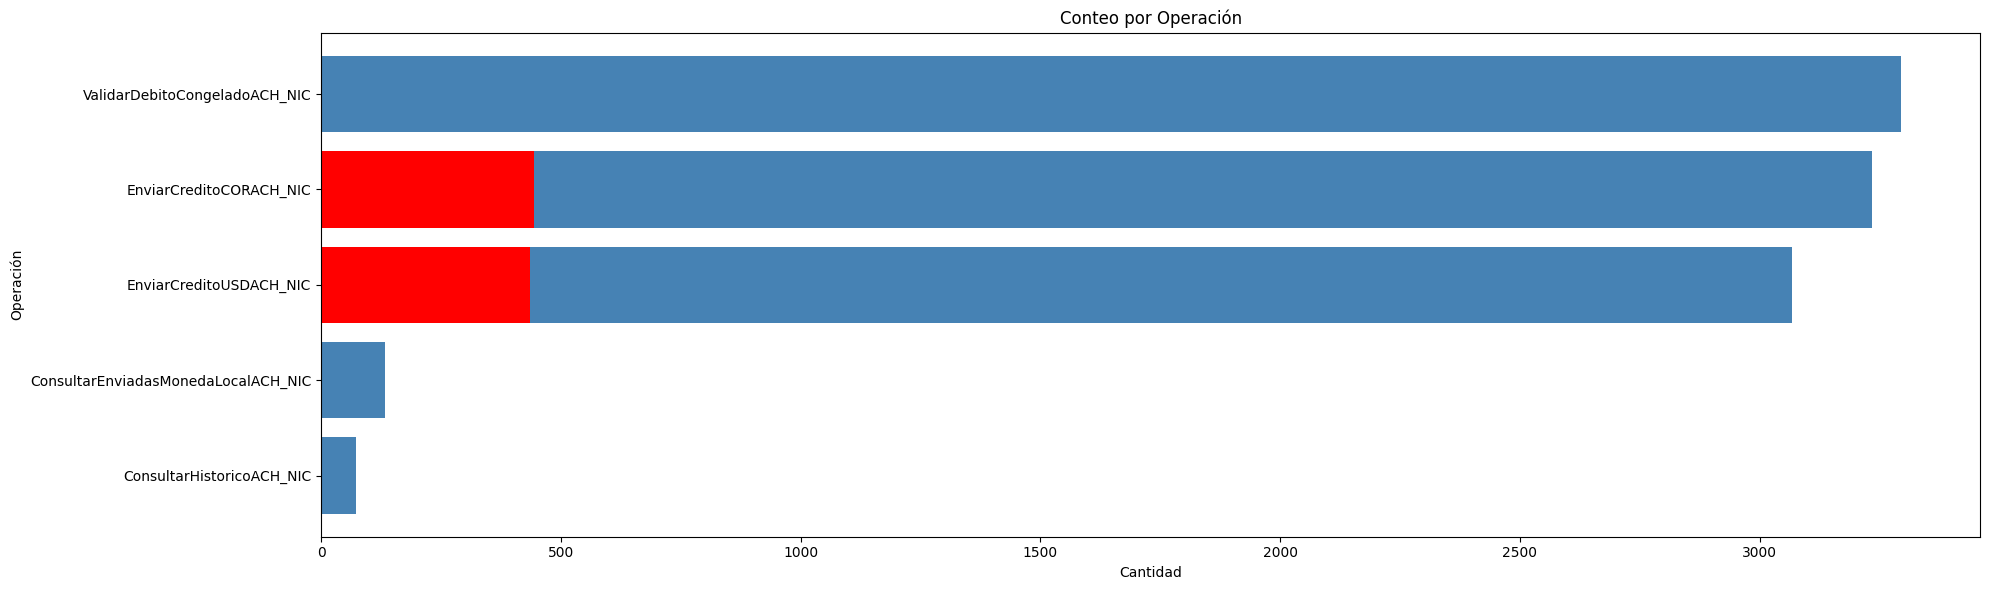

In [100]:
# Definir colores según el valor de 'CODIGO'
colores = DF_Diagnostico_OpCod['CODIGO'].map({'B': 'steelblue', 'M': 'red'})

plt.figure(figsize=(20, 6))
plt.barh(DF_Diagnostico_OpCod['OPERACION'], DF_Diagnostico_OpCod['count'], color=colores)
plt.xlabel('Cantidad')
plt.ylabel('Operación')
plt.title('Conteo por Operación')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()